In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
data_for_model = pd.read_csv(r'C:\Users\DELL\Desktop\Classification_Project\dataset\preprocessed_dataset.csv')

In [4]:
X = data_for_model.drop('Personality', axis=1)
y = data_for_model['Personality']

In [5]:
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0
...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0
2896,3.0,0,8.0,3.0,0,14.0,9.0
2897,4.0,1,1.0,1.0,1,4.0,0.0
2898,11.0,1,1.0,3.0,1,2.0,0.0


In [6]:
y

0       1
1       0
2       0
3       1
4       1
       ..
2895    1
2896    1
2897    0
2898    0
2899    1
Name: Personality, Length: 2900, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred_logistic_reg = logistic_model.predict(X_test_scaled)
print("Logistic Regression Model Accuracy:", logistic_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_logistic_reg))
print(classification_report(y_test, y_pred_logistic_reg))

Logistic Regression Model Accuracy: 0.9189655172413793
[[255  23]
 [ 24 278]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       278
           1       0.92      0.92      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



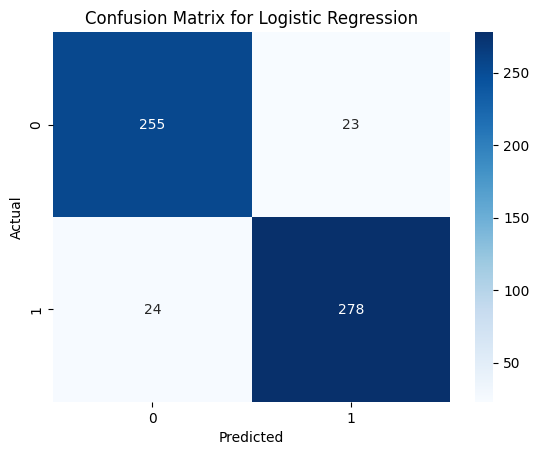

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_logistic_reg = confusion_matrix(y_test, y_pred_logistic_reg)
sns.heatmap(cm_logistic_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [31]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree_model.predict(X_test_scaled)
print("Decision Tree Model Accuracy:", decision_tree_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Model Accuracy: 0.8896551724137931
[[253  25]
 [ 39 263]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       278
           1       0.91      0.87      0.89       302

    accuracy                           0.89       580
   macro avg       0.89      0.89      0.89       580
weighted avg       0.89      0.89      0.89       580



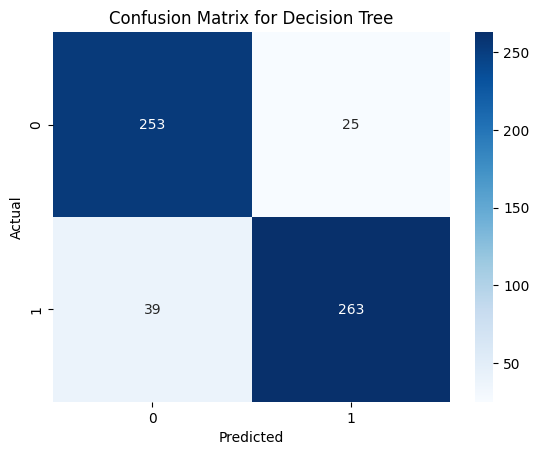

In [36]:
cm_decision_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [34]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
print("Random Forest Model Accuracy:", random_forest_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.9224137931034483
[[258  20]
 [ 25 277]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.93      0.92      0.92       302

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



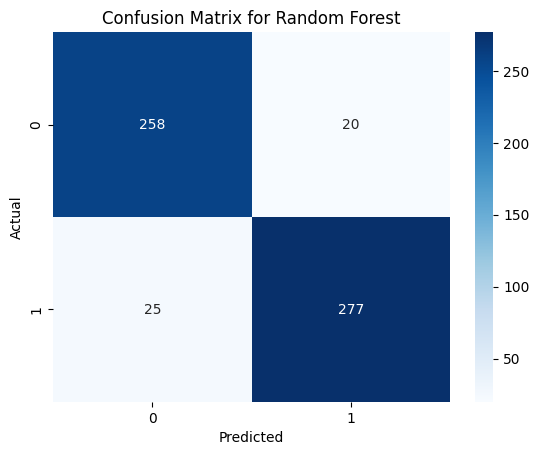

In [38]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [49]:
svc_model = SVC(probability=True)
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)
print("SVC Model Accuracy:", svc_model.score(X_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

SVC Model Accuracy: 0.9293103448275862
[[261  17]
 [ 24 278]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       278
           1       0.94      0.92      0.93       302

    accuracy                           0.93       580
   macro avg       0.93      0.93      0.93       580
weighted avg       0.93      0.93      0.93       580



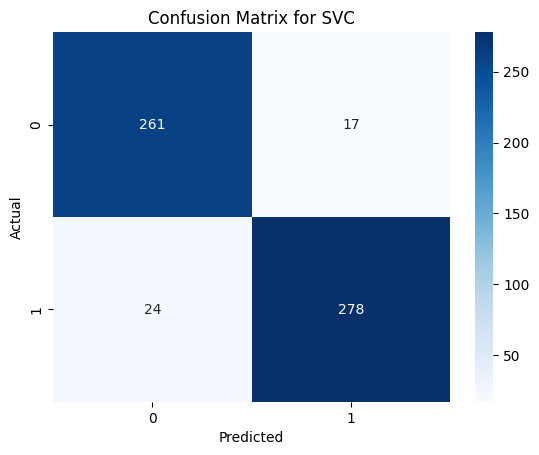

In [50]:
cm_svc = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVC')
plt.show()


c:\Users\DELL\Desktop\Classification_Project\.conda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ROC AUC Score for LR: 0.8303456572490353


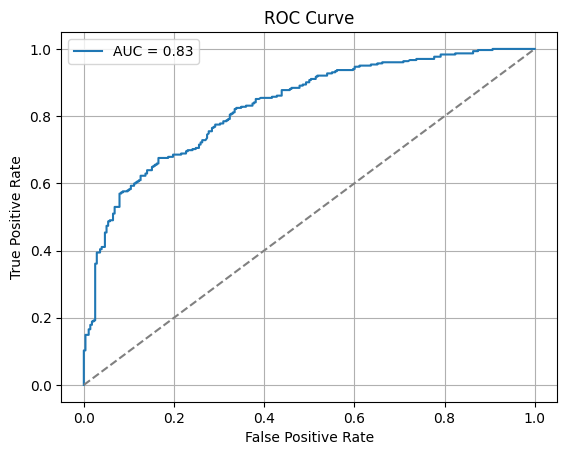

In [55]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score for LR:", auc_score)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


ROC AUC Score for DT: 0.9242936776406689


c:\Users\DELL\Desktop\Classification_Project\.conda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


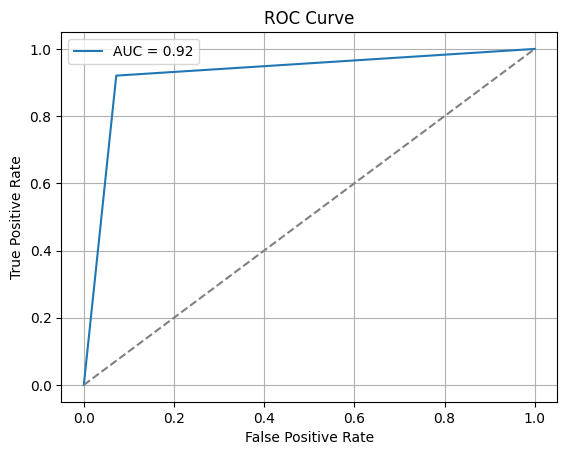

In [54]:
# Predict probabilities
y_probs = decision_tree_model.predict_proba(X_test)[:, 1]

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score for DT:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


ROC AUC Score for RF: 0.9321370717995141


c:\Users\DELL\Desktop\Classification_Project\.conda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


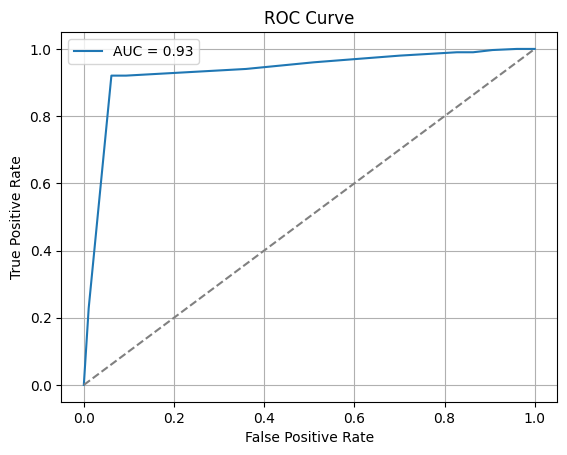

In [53]:
# Predict probabilities
y_probs = random_forest_model.predict_proba(X_test)[:, 1]

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score for RF:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


ROC AUC Score for SVC: 0.8143074944018295


c:\Users\DELL\Desktop\Classification_Project\.conda\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


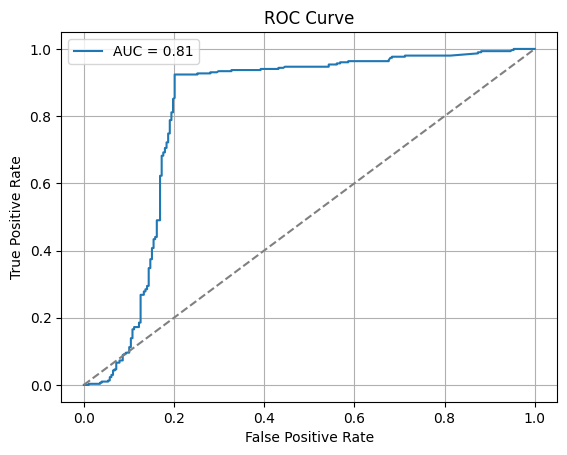

In [52]:
# Predict probabilities
y_probs = svc_model.predict_proba(X_test)[:, 1]

# ROC AUC Score
auc_score = roc_auc_score(y_test, y_probs)
print("ROC AUC Score for SVC:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
